In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier, plot_tree
import statsmodels.api as sm
import numpy as np

In [2]:
# Load the dataset
file_path = 'heart.csv'
heart_data = pd.read_csv(file_path)
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
# Preparing data for logistic regression
X = heart_data.drop('target', axis=1)
y = heart_data['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions for test data
y_pred = log_reg.predict(X_test)

# Preparing data for multiple linear regression
features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
X_lin = heart_data[features]
y_lin = heart_data['target']

# Adding a constant to the model (for the intercept)
X_lin_const = sm.add_constant(X_lin)

# Fitting the model
lin_model = sm.OLS(y_lin, X_lin_const).fit()

# Predictions
predictions = lin_model.predict(X_lin_const)

# Calculate the probabilities of each class for ROC
y_prob = log_reg.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])

# Decision Tree Classifier
# Training a decision tree classifier
dt_classifier = DecisionTreeClassifier(max_depth=3)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

## Histogram of Age
The histogram of age shows the distribution of ages in the dataset. It helps in identifying the age group most commonly represented in the study. A bell-shaped distribution might indicate a normal distribution of ages, while any skewness could point to an over-representation of a particular age group. This is crucial in heart disease analysis as age is a significant risk factor.

## Bar Plot of Chest Pain Types
This bar plot illustrates the frequency of different types of chest pain (represented by 'cp' in the dataset) among the participants. Understanding the prevalence of various chest pain types can be vital in medical research and diagnosis, as some types might be more indicative of heart disease than others.

## Pie Chart of Sex Distribution
The pie chart of sex distribution provides a visual representation of the gender ratio in the dataset. Analyzing the distribution is important to ensure a balanced study and to explore any gender-specific patterns or differences in heart disease occurrence.

## Heatmap of Correlation Matrix
The heatmap of the correlation matrix displays the pairwise correlation between the different features. Features highly correlated with the target variable could be significant predictors for the model. This plot also helps in identifying multicollinearity, where two or more independent variables are highly correlated.

## Confusion Matrix for Logistic Regression
The confusion matrix for logistic regression shows the number of correct and incorrect predictions made by the model, categorized by the actual classes. It's a key metric for assessing the model's performance, particularly its sensitivity and specificity.

## Multiple Linear Regression Plot
The multiple linear regression plot compares the actual values of the target variable with the predicted values. It provides a visual assessment of the model's predictive accuracy. A close alignment of predicted and actual values indicates a well-performing model.

## ROC Curve for Logistic Regression
The ROC curve for logistic regression plots the true positive rate against the false positive rate at various threshold settings. The area under the curve (AUC) is a measure of the model's ability to distinguish between classes. A high AUC value indicates good model performance.

## Decision Tree Classifier
The decision tree classifier plot visualizes the decision-making process of the model. Each node represents a decision based on a feature, leading to a final classification. This plot is helpful in understanding how different features contribute to the final prediction.

# Heart Disease Analysis
This notebook contains visualizations and analyses for the heart disease dataset.

## Histogram of Age
This histogram shows the distribution of ages in the dataset.

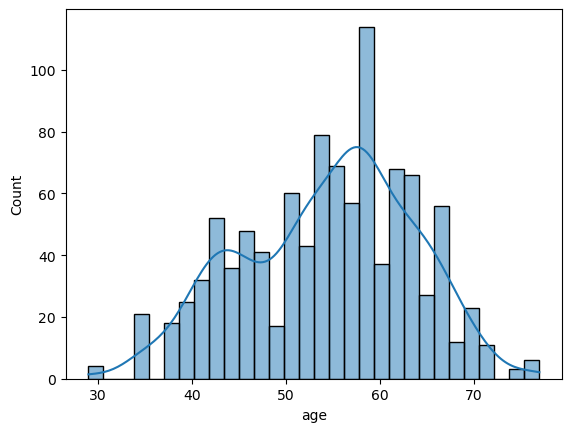

In [4]:
sns.histplot(heart_data['age'], kde=True, bins=30)
plt.show()

## Bar Plot of Chest Pain Types
This bar plot visualizes the frequency of different types of chest pain.

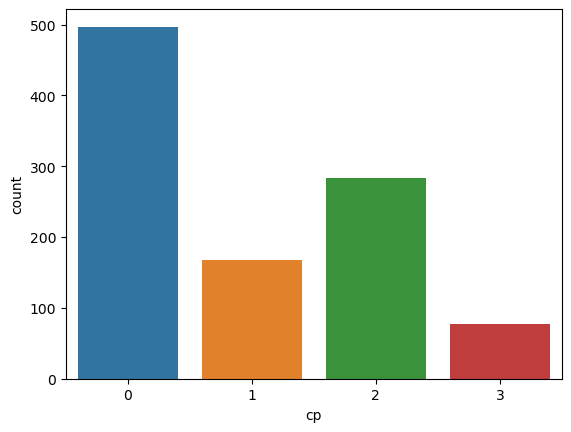

In [5]:
sns.countplot(x='cp', data=heart_data)
plt.show()

## Pie Chart of Sex Distribution
This pie chart displays the proportion of male and female participants.

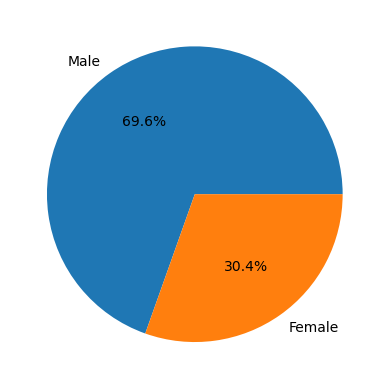

In [7]:
sex_count = heart_data['sex'].value_counts().values
plt.pie(sex_count, labels=['Male', 'Female'], autopct='%1.1f%%')
plt.show()

## Heatmap of Correlation Matrix
This heatmap highlights the correlation between different features.

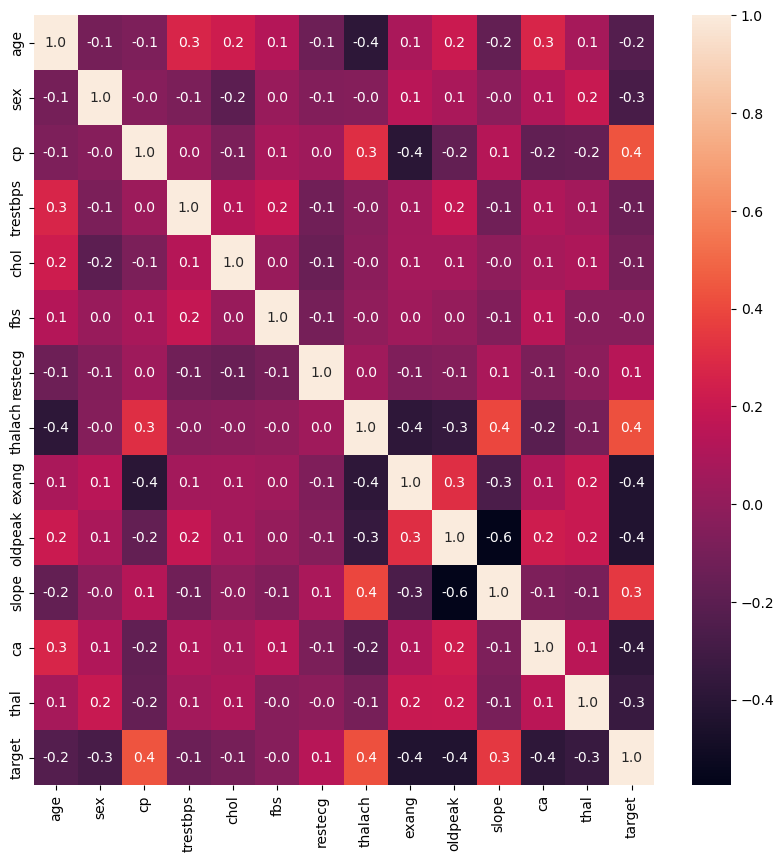

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(heart_data.corr(),annot=True,fmt='.1f')
plt.show()

## Logistic Regression Model
This section includes the confusion matrix for the logistic regression model.

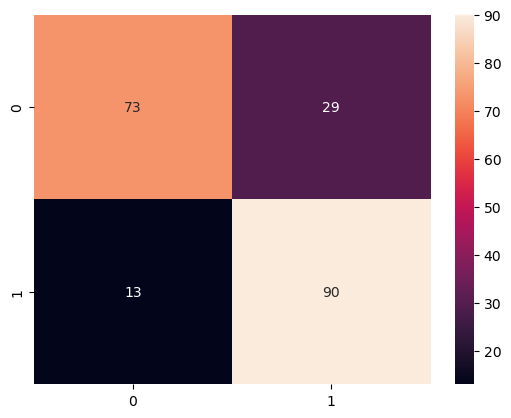

In [9]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

## Multiple Linear Regression Plot
This plot compares the actual values of the target variable with the predicted values from the multiple linear regression model.

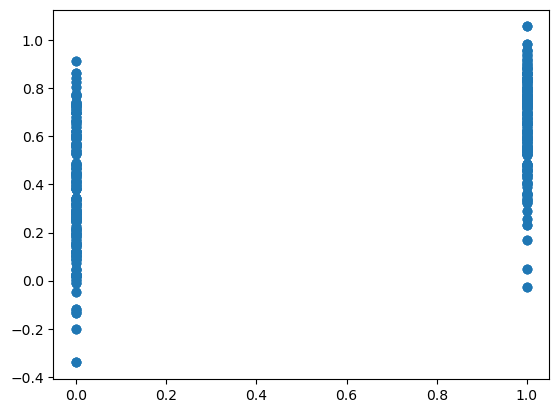

In [10]:
plt.scatter(y_lin, predictions)
plt.show()

## ROC Curve for Logistic Regression
This ROC curve represents the performance of the logistic regression model.

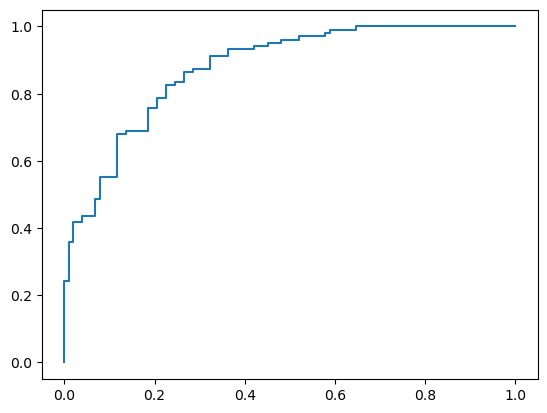

In [11]:
plt.plot(fpr, tpr)
plt.show()

## Decision Tree Classifier
The decision tree classifier visualizes the decision-making process.

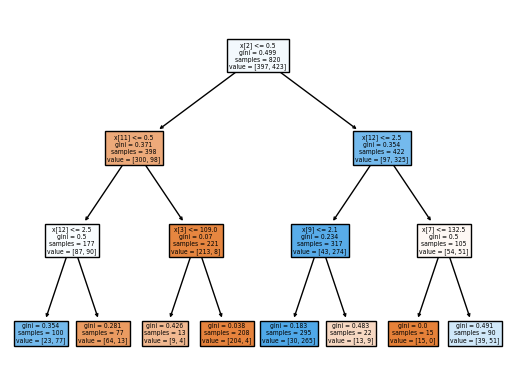

In [12]:
plot_tree(dt_classifier, filled=True)
plt.show()